In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

## Family situation table and drawing diagram

In [4]:
df_family=pd.crosstab(df['family'], 'Count')
df_family.index=['Single', 'Not single']
df_family['%'] = df_family['Count'] / df_family['Count'].sum() * 100
df_family.columns.name=''
df_family.loc['Total'] = df_family[['Count', '%']].sum()
df_family['Count'] = df_family['Count'].astype(int)
df_family.round(decimals=1)

,Count,%
Single,31,37.8
Not single,51,62.2
Total,82,100.0


Text(0, 0.5, '')

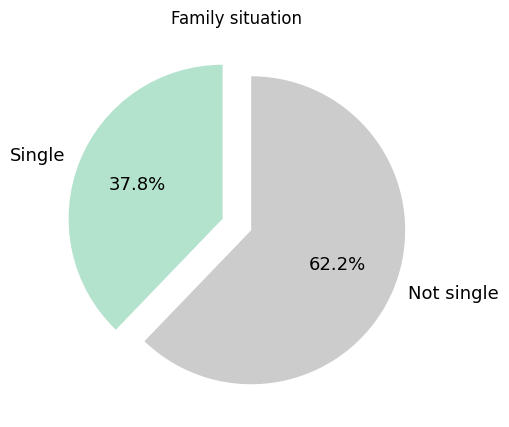

In [13]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1, 0.1),
    figsize    = (6, 5), 
    autopct    = '%1.1f%%',
    title      = 'Family situation'
)

# Poistetaan ylimääräinen label "Count"
ax = df_family_filtered['Count'].plot.pie(**kwargs)
ax.set_ylabel('')  # Poistaa y-akselin otsikon (Count)


In [14]:
df_salary=pd.crosstab(df['salary'], 'Count')
df_salary

bins = [1500, 2500, 3500, 4500, 5500, 6278]
df['salary_class'] = pd.cut(df['salary'], bins=bins)

In [23]:
df_salary = pd.crosstab(df['salary_class'], 'Count')
df_salary.columns.name = ''
n = df_salary['Count'].sum()
df_salary['%'] = df_salary['Count'] / n * 100  # Prosenttilasku
#df_salary.loc['Total'] = df_salary[['Count', '%']].sum()  # Yhteenvetorivi
df_salary['Count'] = df_salary['Count'].astype(int)  # Muutetaan Count kokonaisluvuksi
df_salary = df_salary.round({'%': 1})  # Pyöristetään vain prosentit 1 desimaaliin
df_salary  # Näytetään taulukko


,Count,%
salary_class,,
"(1500, 2500]",47,57.3
"(2500, 3500]",26,31.7
"(3500, 4500]",5,6.1
"(4500, 5500]",3,3.7
"(5500, 6278]",1,1.2


Text(0, 0.5, 'Count, n=82')

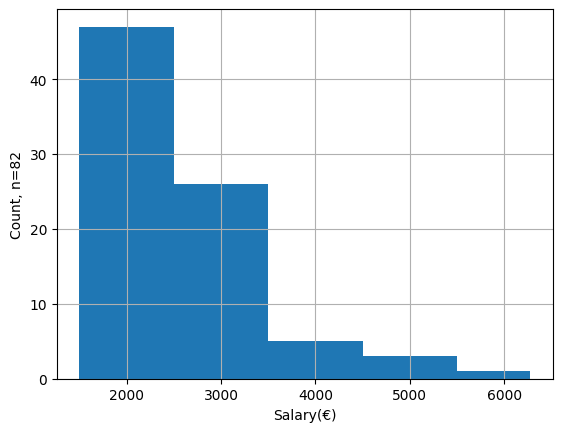

In [29]:
bins = [1500, 2500, 3500, 4500, 5500, 6278]
df['salary'].hist(bins = bins)

plt.xlabel('Salary(€)')
plt.ylabel('Count, n=' + str(n))



In [39]:

df_satcolleques = pd.crosstab(df['sat_colleques'], 'Count')
df_satcolleques.index = ['Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied'] 
df_satcolleques.loc['Very unsatisfied'] = 0
df_satcolleques = df_satcolleques.reindex(['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied'])
n = df_satcolleques['Count'].sum()
df_satcolleques.loc['Total'] = df_satcolleques['Count'].sum()
df_satcolleques




col_0,Count
Very unsatisfied,0
Unsatisfied,3
Neutral,16
Satisfied,35
Very satisfied,27
Total,81


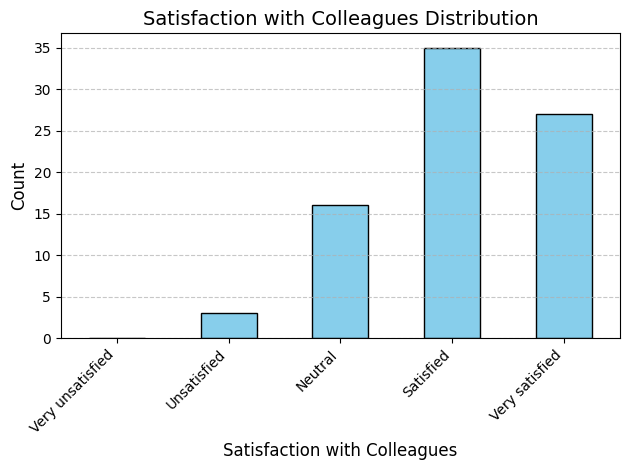

In [40]:
# Poistetaan "Total"-rivi ennen kaavion piirtämistä
df_satcolleques_filtered = df_satcolleques[:-1]

# Piirretään pylväsdiagrammi
df_satcolleques_filtered['Count'].plot(kind='bar', color='skyblue', edgecolor='black')

# Akselin ja otsikon asettaminen
plt.xlabel('Satisfaction with Colleagues', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Satisfaction with Colleagues Distribution', fontsize=14)

# Asetetaan x-akselin nimikkeet
plt.xticks(rotation=45, ha='right')

# Lisätään ruudukko ja tiivistetään ulkoasua
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Varmistetaan, että kaikki teksti näkyy
plt.show()


In [41]:
df_satworkingenvironment=pd.crosstab(df['sat_workingEnvironment'], 'Count')
df_satworkingenvironment.index=['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_satworkingenvironment.columns.name='Satisfaction with working environment'
n = df_satworkingenvironment['Count'].sum()
df_satworkingenvironment.loc['Total'] = df_satworkingenvironment[['Count']].sum()
df_satworkingenvironment

Satisfaction with working environment,Count
Very unsatisfied,9
Unsatisfied,9
Neutral,30
Satisfied,23
Very satisfied,11
Total,82


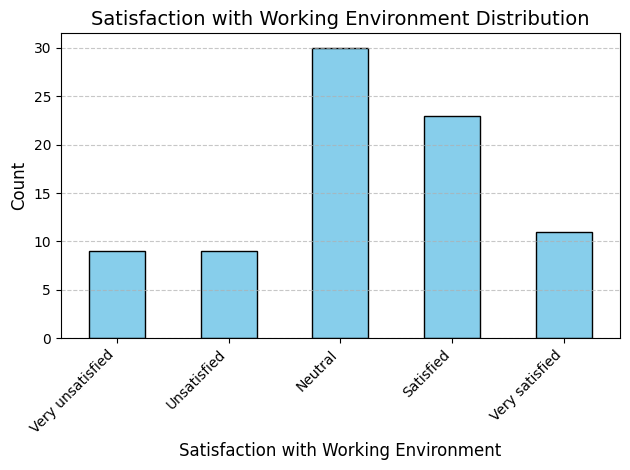

In [42]:
# Poistetaan "Total"-rivi ennen kaavion piirtämistä
df_satworkingenvironment_filtered = df_satworkingenvironment[:-1]  # Jätetään pois viimeinen rivi (Total)

# Piirretään pylväsdiagrammi
df_satworkingenvironment_filtered['Count'].plot(kind='bar', color='skyblue', edgecolor='black')

# Akselin ja otsikon asettaminen
plt.xlabel('Satisfaction with Working Environment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Satisfaction with Working Environment Distribution', fontsize=14)

# Asetetaan x-akselin nimikkeet
plt.xticks(rotation=45, ha='right')

# Lisätään ruudukko ja tiivistetään ulkoasua
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Varmistetaan, että kaikki teksti näkyy
plt.show()


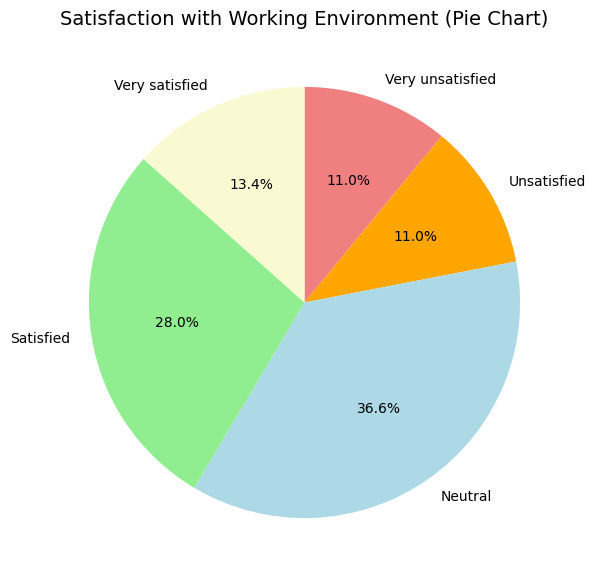

In [43]:
# Poistetaan "Total"-rivi ennen kaavion piirtämistä
df_satworkingenvironment_filtered = df_satworkingenvironment[:-1]  # Jätetään pois viimeinen rivi (Total)

# Piirretään piirakkakaavio
df_satworkingenvironment_filtered['Count'].plot.pie(
    autopct='%1.1f%%',   # Näytetään prosenttiosuudet
    colors=['lightcoral', 'orange', 'lightblue', 'lightgreen', 'lightgoldenrodyellow'],  # Värit eri kategorioille
    startangle=90,       # Aloitetaan kaavio klo 12:sta
    counterclock=False,  # Pyöritetään myötäpäivään
    figsize=(7, 7)       # Kaavion koko
)

# Asetetaan otsikko
plt.title('Satisfaction with Working Environment (Pie Chart)', fontsize=14)
plt.ylabel('')  # Poistetaan y-akselin nimi (pie chart ei tarvitse sitä)
plt.show()


In [ ]:
df4 = pd.crosstab(df['age_class'], df['sat_salary'])
#df4.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
#df4.columns = ['woman', 'man']
df4

In [ ]:
df4 = pd.crosstab(df['gender'], df['sat_management']) 
#df4.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
#df4.columns = ['woman', 'man']
df4

In [44]:
# Ristiintaulukointi perhesuhteiden ja työkavereiden tyytyväisyyden välillä
df_crosstab = pd.crosstab(df['family'], df['sat_colleques'], margins=True, margins_name="Total")

# Tulosta ristiintaulukointi
df_crosstab


sat_colleques,2.0,3.0,4.0,5.0,Total
family,,,,,
1,2,6,14,9,31
2,1,10,21,18,50
Total,3,16,35,27,81


sat_colleques      2.0  3.0  4.0  5.0  Total
family                                      
In a Relationship    1   10   21   18     50
Single               2    6   14    9     31
Total                3   16   35   27     81


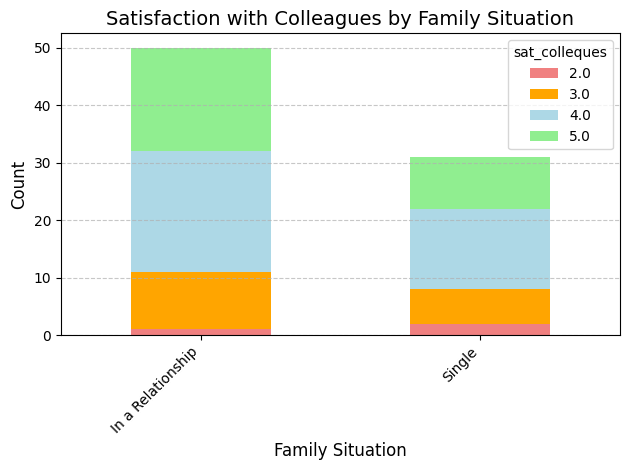

In [46]:
# Määritellään perhesuhteet kuvaavammiksi
df['family'] = df['family'].map({1: 'Single', 2: 'In a Relationship'})

# Ristiintaulukointi perhesuhteiden ja työkavereiden tyytyväisyyden välillä
df_crosstab = pd.crosstab(df['family'], df['sat_colleques'], margins=True, margins_name="Total")

# Tulosta ristiintaulukointi
print(df_crosstab)

# Ristiintaulukoinnin visualisointi
df_crosstab = pd.crosstab(df['family'], df['sat_colleques'])

# Piirretään stacked bar chart
df_crosstab.plot(kind='bar', stacked=True, color=['lightcoral', 'orange', 'lightblue', 'lightgreen'])

# Akselin ja otsikon asettaminen
plt.xlabel('Family Situation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Satisfaction with Colleagues by Family Situation', fontsize=14)

# Lisätään x-akselin nimikkeet
plt.xticks(rotation=45, ha='right')

# Lisätään ruudukko
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

